In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [3]:
df = pd.read_csv('stock_data.csv')

In [4]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [5]:
df.shape

(5791, 2)

In [6]:
df['Text'][100]

'BAC In  12.00 since there is consolidation  this level. We could close = > 12.09 if market is stable in pm IMHO.'

In [7]:
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [8]:
df['Sentiment'].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

In [9]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

In [10]:
ps = PorterStemmer()

In [11]:
corpus = stopwords.words('english')
new_corpus = []

In [12]:
lst = ['down','out','over','under','again']

In [13]:
for i in new_corpus:
    if i not in lst:
        new_corpus.append(i)
        

In [14]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y.copy()
    y.clear()
    
    
    for i in text:
        if i not in new_corpus and i not in string.punctuation:
            y.append(i)
            
    text = y.copy()
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [15]:
df['text_tranformed'] = df['Text'].apply(transform_text)

In [16]:
df.head()

,Text,Sentiment,text_tranformed
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kicker on my watchlist xide tit soq pnk cpw bp...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user aap movi 55 return for the indic just 15 ...
2,user I'd be afraid to short AMZN - they are lo...,1,user i be afraid to short amzn they are look l...
3,MNTA Over 12.00,1,mnta over
4,OI Over 21.37,1,oi over


In [17]:
from wordcloud import WordCloud

In [18]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [19]:
positive = wc.generate(df[df['Sentiment']==1]['text_tranformed'].str.cat(sep=' '))

In [20]:
import matplotlib.pyplot as plt

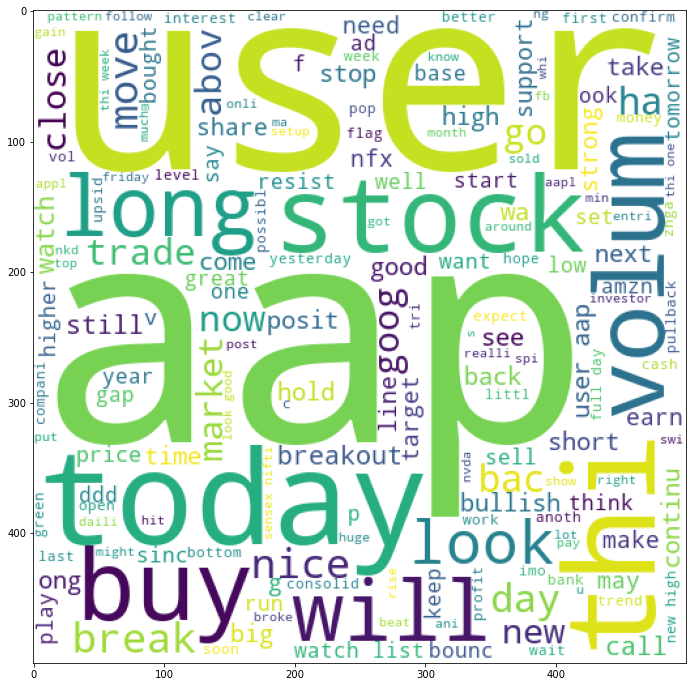

In [21]:
plt.figure(figsize = (12,12))
plt.imshow(positive)

In [22]:
negative = wc.generate(df[df['Sentiment']==-1]['text_tranformed'].str.cat(sep = " "))

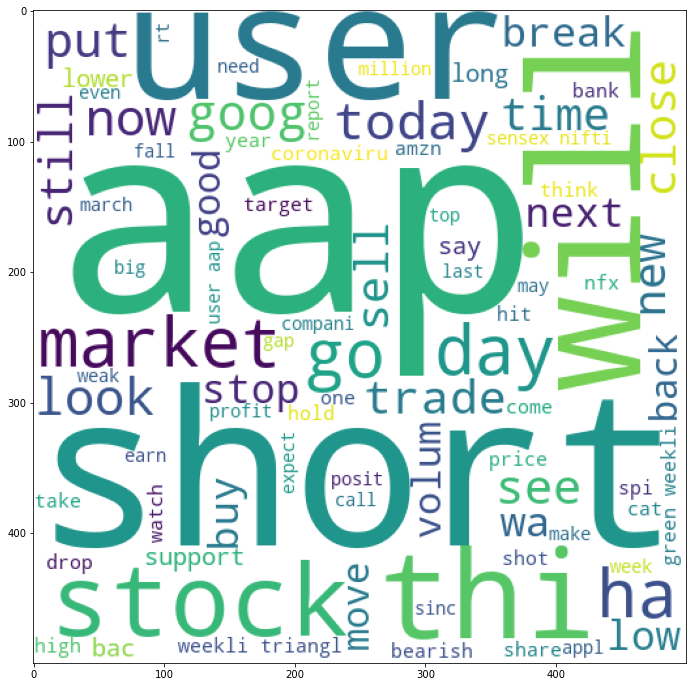

In [23]:
plt.figure(figsize = (12,12))
plt.imshow(negative)

# Vectorization

In [24]:
X = df['text_tranformed']
y = df['Sentiment']

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
cv = CountVectorizer()
X_cv = cv.fit_transform(X).toarray()


In [27]:
X_cv.shape

(5791, 6711)

In [28]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X).toarray()

In [29]:
X_tfidf.shape

(5791, 6711)

In [30]:
X = X_cv

In [31]:
y_new = []

for i in y:
    if i==1:
        y_new.append(1)
    else:
        y_new.append(0)

In [32]:
y = y_new.copy()

# Model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [36]:
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
xgb_clf = XGBClassifier()

In [37]:
models = {'LR_CLF' : lr_clf,
         'DT_CLF' : dt_clf,
         'RF_CLF' : rf_clf,
         'XGB_CLF' : xgb_clf}

In [38]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(name)
    print('Train Accuracy score : {} Test Accuracy score  : {}'.format(accuracy_score(y_train,y_train_pred), 
                                                                      accuracy_score(y_test, y_test_pred)))
    
    print('Train Precision score : {} Test Precision score  : {}'.format(precision_score(y_train,y_train_pred), 
                                                                      precision_score(y_test, y_test_pred)))
    print('Train Recall score : {} Test Recall score  : {}'.format(recall_score(y_train,y_train_pred), 
                                                                      recall_score(y_test, y_test_pred)))
    
    print('*'*80)
    
    

LR_CLF
Train Accuracy score : 0.9440846286701209 Test Accuracy score  : 0.8006902502157032
Train Precision score : 0.9407722513089005 Test Precision score  : 0.8257477243172952
Train Recall score : 0.9735861835421605 Test Recall score  : 0.8674863387978142
********************************************************************************
DT_CLF
Train Accuracy score : 0.9997841105354058 Test Accuracy score  : 0.7610008628127696
Train Precision score : 1.0 Test Precision score  : 0.8037383177570093
Train Recall score : 0.9996613613274636 Test Recall score  : 0.8224043715846995
********************************************************************************
RF_CLF
Train Accuracy score : 0.9997841105354058 Test Accuracy score  : 0.8050043140638481
Train Precision score : 0.9996614759647935 Test Precision score  : 0.8131188118811881
Train Recall score : 1.0 Test Recall score  : 0.8975409836065574
********************************************************************************
XGB_CLF
Train Ac